In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [43]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [44]:
f"{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}" 

'(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)'

In [45]:
import matplotlib.pyplot as plt

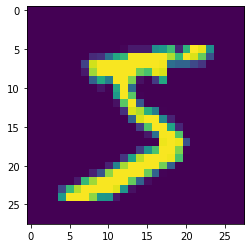

In [46]:
plt.imshow(X_train[0])

In [47]:
X_train = X_train/255
X_test = X_test/255

In [48]:
model = Sequential()

In [49]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='Adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'] )

In [52]:
history = model.fit(X_train,y_train,batch_size=64,epochs = 20,verbose = 1,validation_split= 0.2)

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3313 - accuracy: 0.9073 - val_loss: 0.1837 - val_accuracy: 0.9491
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1513 - accuracy: 0.9563 - val_loss: 0.1344 - val_accuracy: 0.9611
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1065 - accuracy: 0.9694 - val_loss: 0.1189 - val_accuracy: 0.9663
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0803 - accuracy: 0.9766 - val_loss: 0.1073 - val_accuracy: 0.9679
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0632 - accuracy: 0.9820 - val_loss: 0.0962 - val_accuracy: 0.9728
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.0903 - val_accuracy: 0.9734
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.0888 - val_accuracy: 0.9741
Epoch 

In [53]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 936us/step - loss: 0.1003 - accuracy: 0.9749


[0.1002637967467308, 0.9749000072479248]

In [54]:
model.predict(X_test)

array([[3.1228164e-10, 4.9066332e-14, 4.3055741e-09, ..., 9.9997699e-01,
        3.6112151e-11, 1.2334199e-08],
       [2.9641955e-13, 4.8545189e-07, 9.9999952e-01, ..., 1.7247315e-20,
        1.7162280e-10, 2.7211936e-24],
       [9.0673247e-09, 9.9983644e-01, 1.0825246e-05, ..., 4.4252272e-05,
        1.0772728e-04, 8.3388962e-10],
       ...,
       [8.5070366e-19, 4.8967132e-18, 3.9744121e-19, ..., 5.9300611e-12,
        1.3250109e-13, 6.8188100e-08],
       [4.6760559e-20, 4.3219710e-21, 8.4924603e-16, ..., 3.4394232e-19,
        1.5019449e-08, 1.0958216e-20],
       [6.7497948e-14, 3.3827688e-19, 9.4227354e-16, ..., 2.3625407e-22,
        5.9674472e-16, 1.0642863e-17]], dtype=float32)

In [55]:
model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

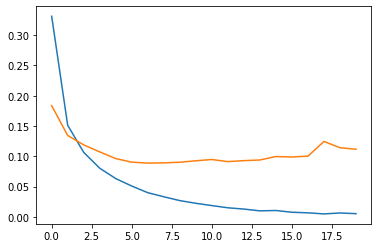

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])